# K-means 範例

範例目標：讓同學了解如何使用 sklearn 執行 k-means <br />
範例重點：設定 模型估計參數 以及 資料建模 兩大區塊 <br />
(Optional) 若尚未安裝相關套件，執行下一行，然後 restart kernel <br />

In [1]:
!pip3 install --user sklearn
!pip3 install --user --upgrade matplotlib

You are using pip version 9.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 14.4MB 94kB/s  eta 0:00:01
Requirement already up-to-date: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /Users/xiejialun/Library/Python/3.6/lib/python/site-packages (from matplotlib)
Requirement already up-to-date: cycler>=0.10 in /Users/xiejialun/Library/Python/3.6/lib/python/site-packages (from matplotlib)
    100% |████████████████████████████████| 122kB 505kB/s ta 0:00:01
Requirement already up-to-date: python-dateutil>=2.1 in /Users/xiejialun/Library/Python/3.6/lib/python/site-packages (from matplotlib)
Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 13.9MB 94kB/s  eta 0:00:01
Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
Cache entry deserialization failed, entry ignored
  Using cached https://fi

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

In [4]:
toy = datasets.make_blobs(centers = 3, n_features = 4)
x = toy[0]
y = toy[1]

In [6]:
estimators = [ ('k_means_8'  , KMeans(n_clusters = 8)) ,
                     ('k_means_3' , KMeans(n_clusters = 3)) ,
                     ('k_means_bad_init' , KMeans(n_clusters = 3, n_init = 1, init = 'random'))]

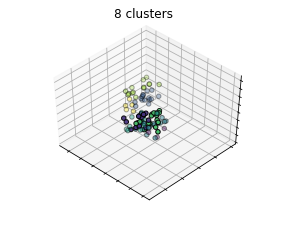

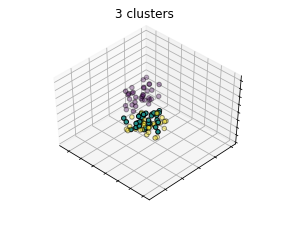

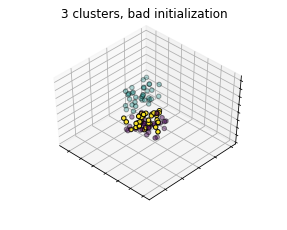

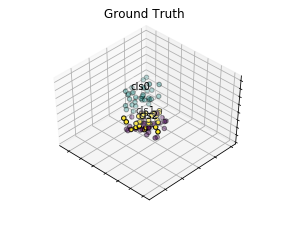

In [9]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']

for name, est in estimators:
    fig = plt.figure( fignum, figsize = (4,3) )
    ax = Axes3D(fig, rect = [0, 0, 0.95, 1], elev = 48, azim = 134)
    
    est.fit(x)
    
    labels = est.labels_
    
    ax.scatter(x[:,3], x[:,0], x[:,2], c = labels.astype(np.float), edgecolor = 'k')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

#plot the ground truth
fig = plt.figure(fignum, figsize = (4,3))
ax = Axes3D(fig, rect = [0,0,0.95,1], elev = 48, azim = 134)

for name, label in [('cls0', 0), ('cls1',1), ('cls2',2)] :
    ax.text3D(x[ y == label, 3].mean(), x[y==label,0].mean(), x[y==label,2].mean() + 2 , name,
             horizontalalignment = 'center', bbox = dict(alpha = 0.2, edgecolor = '2', facecolor = 'w'))
#Reorder the labels to have colors matching the cluster results

y = np.choose(y,[1,2,0]).astype(np.float)
ax.scatter(x[:,3],x[:,0],x[:,2], c=y, edgecolor = 'k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

# 作業
<br />
作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [27]:
iris = datasets.load_iris()
x = iris.data[:,[2,3]]
y = iris.target

In [28]:
features = iris.feature_names
targets = iris.target_names

print(f' dataset feature names : {features}' )
print(f' dataset target names : {targets}')

 dataset feature names : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
 dataset target names : ['setosa' 'versicolor' 'virginica']


In [31]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.4, random_state = 2019)

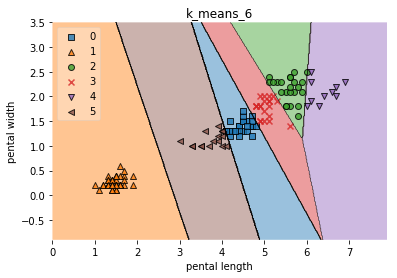

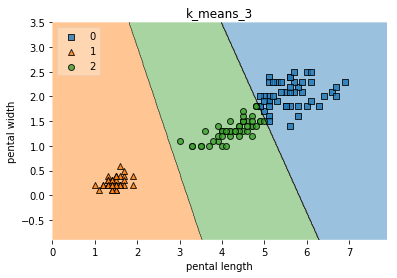

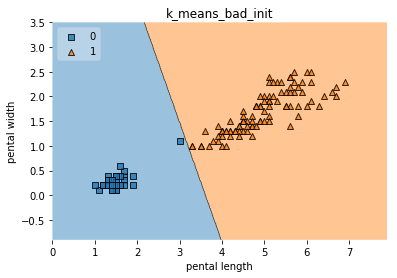

In [37]:
from mlxtend.plotting import plot_decision_regions

estimators = [('k_means_6', KMeans(n_clusters = 6)), ('k_means_3', KMeans(n_clusters = 3)),
              ('k_means_bad_init', KMeans(n_clusters = 2, n_init = 1, init = 'random')) ]

idx = 1
titles = ['6 clusters', '3 clusters', '2 clusters with bad initialization']

for name, est in estimators:
    
    est.fit(x)
    labels = est.labels_
    plot_decision_regions(x, labels, clf = est, legend = 2)
    plt.xlabel('pental length')
    plt.ylabel('pental width')
    plt.title(name)
    plt.show()
    


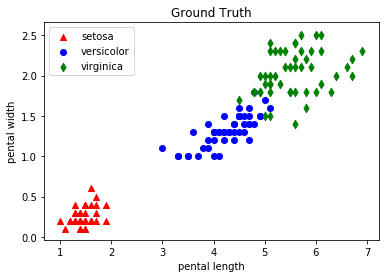

In [61]:
plt.scatter(x[(y == 0), 0],x[ (y == 0) , 1], marker = '^', c = 'r', label = targets[0])
plt.scatter(x[(y == 1), 0], x[ (y==1) , 1] , marker = 'o', c = 'b' , label = targets[1])
plt.scatter(x[(y == 2), 0], x[ (y==2) , 1] , marker = 'd', c = 'g' , label = targets[2])
plt.title('Ground Truth')
plt.xlabel('pental length')
plt.ylabel('pental width')
plt.legend(loc = 'upper left')
plt.show()